In [1]:
# https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # ignoring pandas warning for future versions
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
MtCO2 = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
MtCO2

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
0      Afghanistan                AFG  1750      0.000000           NaN   
1      Afghanistan                AFG  1751      0.000000           NaN   
2      Afghanistan                AFG  1752      0.000000           NaN   
3      Afghanistan                AFG  1753      0.000000           NaN   
4      Afghanistan                AFG  1754      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
0               NaN          NaN          NaN         NaN         NaN   
1               NaN          NaN          NaN         NaN         NaN   
2               NaN          NaN          NaN         NaN         NaN   
3               NaN          NaN          NaN         NaN         NaN   
4               NaN          NaN          NaN         NaN         NaN   
...             ...          ...          ...         ...         ...   
63099  12242.627935  7144.928128  1507.923185  391.992176  302.294047   
63100  12266.016285  7529.846784  1569.218392  412.115746  302.478706   
63101  12345.653374  7647.528220  1617.506786  439.253991  306.638573   
63102  11191.808551  7556.290283  1637.537532  407.583673  296.301685   
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   

       Per Capita  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
63099    4.749682  
63100    4.792753  
63101    4.775633  
63102    4.497423  
63103    4.693699  

[63104 rows x 11 columns]

In [4]:
# I assume that if a nation has NaN as a value then its emission is 0. Afghanistan didn't have any industry in the 18th century
MtCO2.fillna(0, inplace = True)
MtCO2.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   0.0  0.0  0.0     0.0   
1  Afghanistan                AFG  1751    0.0   0.0  0.0  0.0     0.0   
2  Afghanistan                AFG  1752    0.0   0.0  0.0  0.0     0.0   
3  Afghanistan                AFG  1753    0.0   0.0  0.0  0.0     0.0   
4  Afghanistan                AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  
0      0.0    0.0         0.0  
1      0.0    0.0         0.0  
2      0.0    0.0         0.0  
3      0.0    0.0         0.0  
4      0.0    0.0         0.0

In [5]:
# Let's make all labels lower case
MtCO2.columns = MtCO2.columns.str.lower()
MtCO2.columns

Index(['country', 'iso 3166-1 alpha-3', 'year', 'total', 'coal', 'oil', 'gas',
       'cement', 'flaring', 'other', 'per capita'],
      dtype='object')

In [6]:
# Checking data types
MtCO2.dtypes

country                object
iso 3166-1 alpha-3     object
year                    int64
total                 float64
coal                  float64
oil                   float64
gas                   float64
cement                float64
flaring               float64
other                 float64
per capita            float64
dtype: object

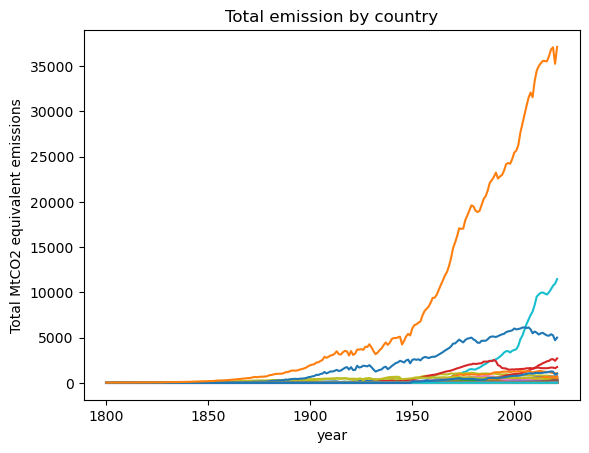

In [7]:
# Let's have a quick view about the emissions increase during years starting from 1800
for country in MtCO2['country'].unique():
  sns.lineplot(x = MtCO2[(MtCO2['country'] == country) & (MtCO2['year'] >= 1800)]['year'],
               y = MtCO2[MtCO2['country'] == country]['total']).set(title='Total emission by country' , ylabel='Total MtCO2 equivalent emissions')

In [8]:
MtCO2['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [9]:
# The countries are too many to label. Let's just focus on those which emits the most compared to global emissions
Global = MtCO2.groupby(['country']).sum()['total'].loc['Global'].astype(int)
Global

1736930

In [10]:
# Let's create a new dataset ordered by most emitters countries excluding Global. We'll need the iso column later
most_emitters = MtCO2.groupby(['country', 'iso 3166-1 alpha-3']).sum()[['total']].sort_values(by=['total'], ascending = False).reset_index()
most_emitters = most_emitters[1:]
most_emitters

country iso 3166-1 alpha-3          total
1                USA                USA  421906.855203
2              China                CHN  249352.817660
3             Russia                RUS  117547.631435
4            Germany                DEU   93290.503809
5     United Kingdom                GBR   78508.720102
..               ...                ...            ...
227             Niue                NIU       0.301987
228           Tuvalu                TUV       0.286818
229      Puerto Rico                PRI       0.208848
230  Leeward Islands                  0       0.179536
231       Antarctica                ATA       0.153888

[231 rows x 3 columns]

In [11]:
# Adding a new column as cumulative sum in order to add togheter the total emissions
most_emitters['cumulative'] = most_emitters['total'].cumsum()
most_emitters.head()
    

country iso 3166-1 alpha-3          total     cumulative
1             USA                USA  421906.855203  421906.855203
2           China                CHN  249352.817660  671259.672863
3          Russia                RUS  117547.631435  788807.304298
4         Germany                DEU   93290.503809  882097.808107
5  United Kingdom                GBR   78508.720102  960606.528209

In [12]:
# Let's take only the country list which its cumulative sum of emissions is 70% of global emissions
treshold = 0.7 * Global
print('treshold is:', treshold)

countries_at_treshold = most_emitters[most_emitters['cumulative'] <= treshold][['country']]
countries_at_treshold

treshold is: 1215851.0


country
1                       USA
2                     China
3                    Russia
4                   Germany
5            United Kingdom
6                     Japan
7                     India
8   International Transport
9                    France
10                   Canada

In [13]:
# Filtering the initial datasets by the most cumulative emitters countries
MtCO2_most = MtCO2[MtCO2['country'].isin(countries_at_treshold['country'])]
MtCO2_most['country'].unique()

array(['Canada', 'China', 'France', 'Germany', 'India', 'Japan', 'Russia',
       'United Kingdom', 'USA', 'International Transport'], dtype=object)

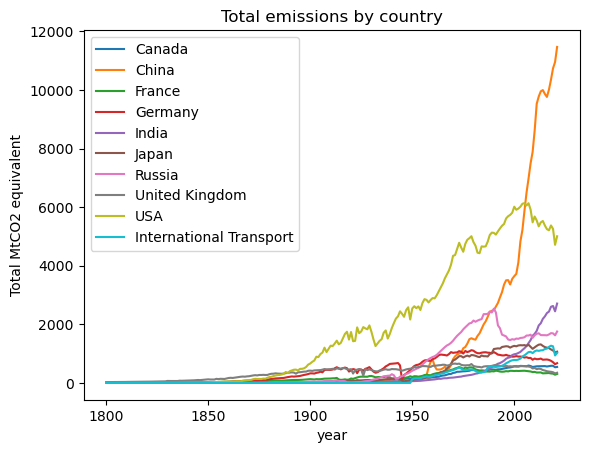

In [14]:
# Let's redo the first chart after the adjustments
for country in MtCO2_most['country'].unique():
  sns.lineplot(x = MtCO2_most[(MtCO2_most['country'] == country) & (MtCO2_most['year'] >= 1800)]['year'], 
               y = MtCO2_most[MtCO2_most['country'] == country]['total'],
               label = country).set(title='Total emissions by country' , ylabel='Total MtCO2 equivalent')

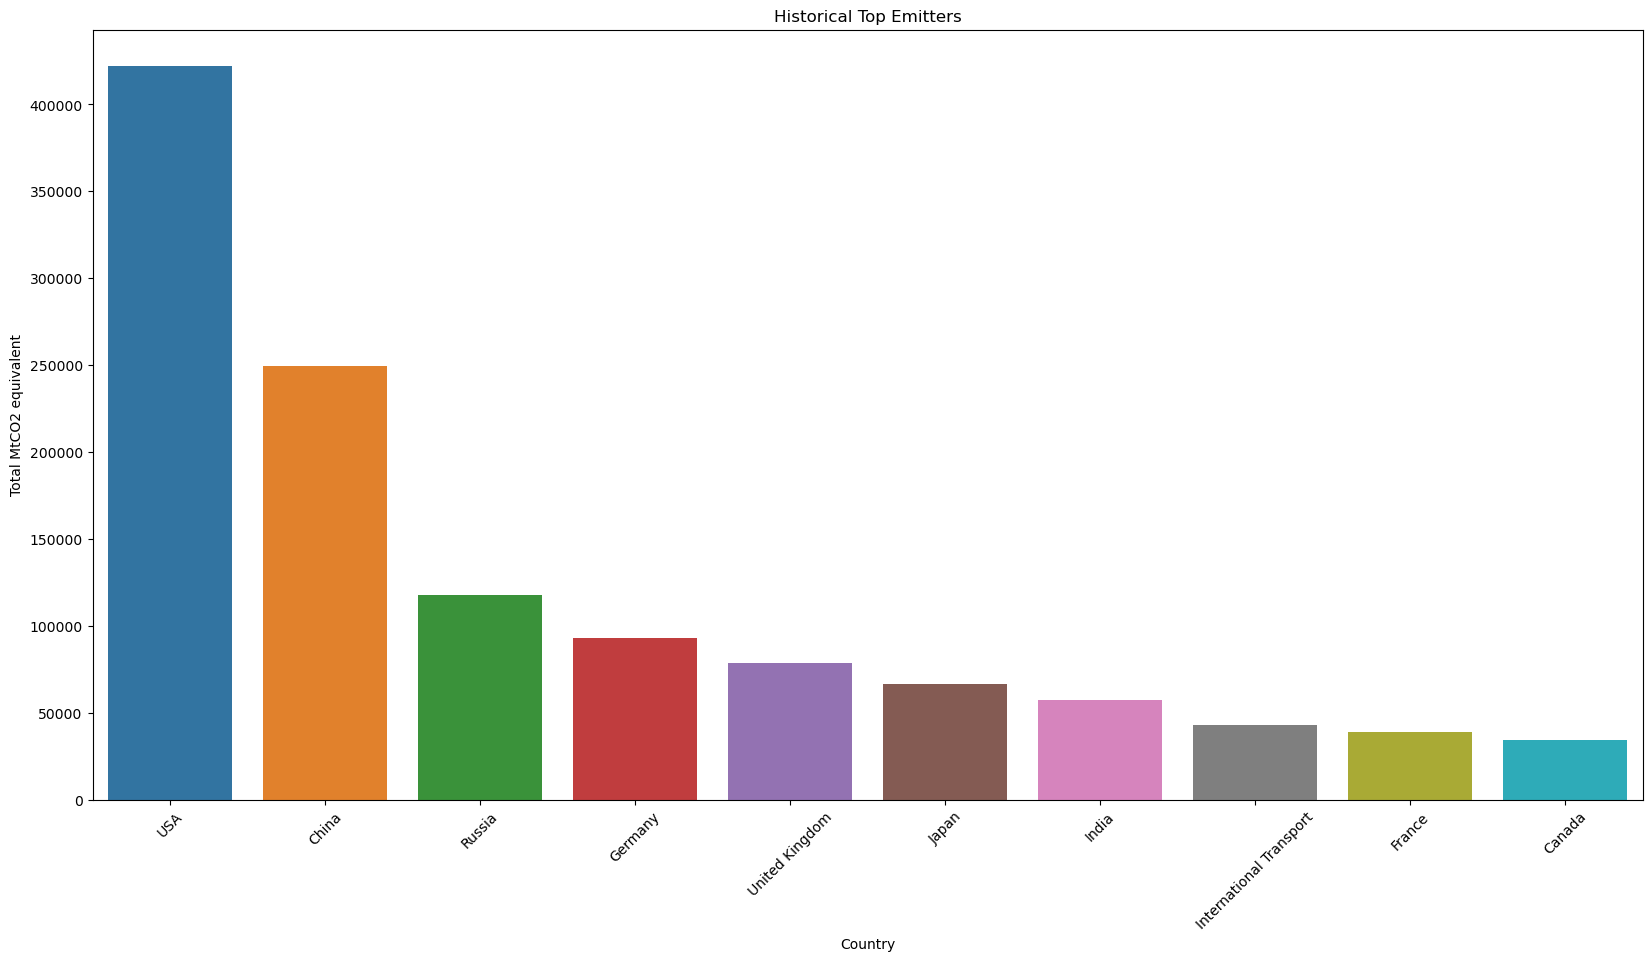

In [15]:
# Let's create a chart about historical total emissions
lenght = len(MtCO2_most['country'].unique())

sns.barplot(x = most_emitters['country'][0:lenght], y = most_emitters['total'][0:lenght], label = 'country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total MtCO2 equivalent')
plt.title('Historical Top Emitters')
plt.gcf().set_size_inches(20,10)

In [17]:
# Even if the China is currently emitting more, the USA is the country that has emitted the most among the others during its history

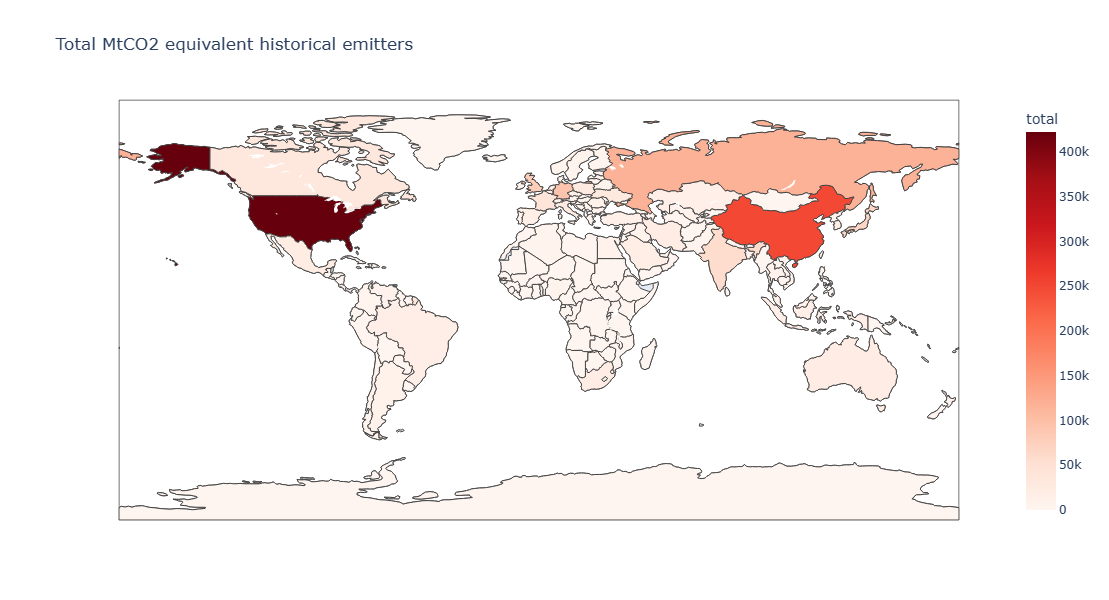

In [16]:
# Showing cumulative total MtCO2 emissions on a map
import plotly.express as px

fig_1 = px.choropleth(
    most_emitters,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'total',
    color_continuous_scale='Reds',
    title = 'Total MtCO2 equivalent historical emitters'
)
fig_1.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_1.show()

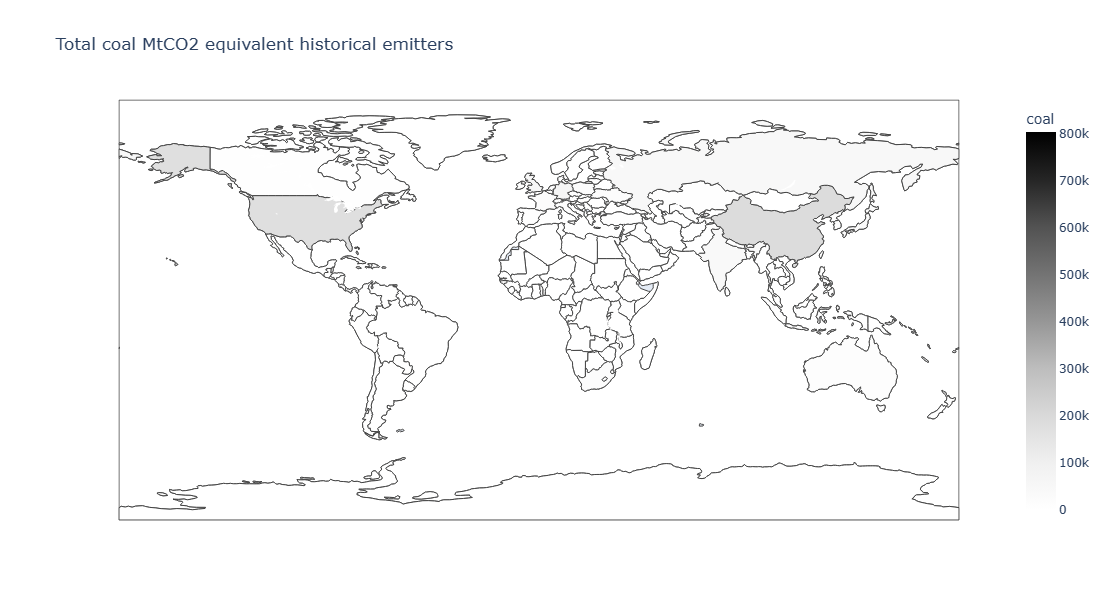

In [18]:
# Showing cumulative coal MtCO2 emissions on a map
coal_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'coal']]
coal_emissions = coal_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
coal_emissions.reset_index(inplace = True)


fig_2 = px.choropleth(
    coal_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'coal',
    color_continuous_scale='Greys',
    title = 'Total coal MtCO2 equivalent historical emitters'
)
fig_2.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_2.show()


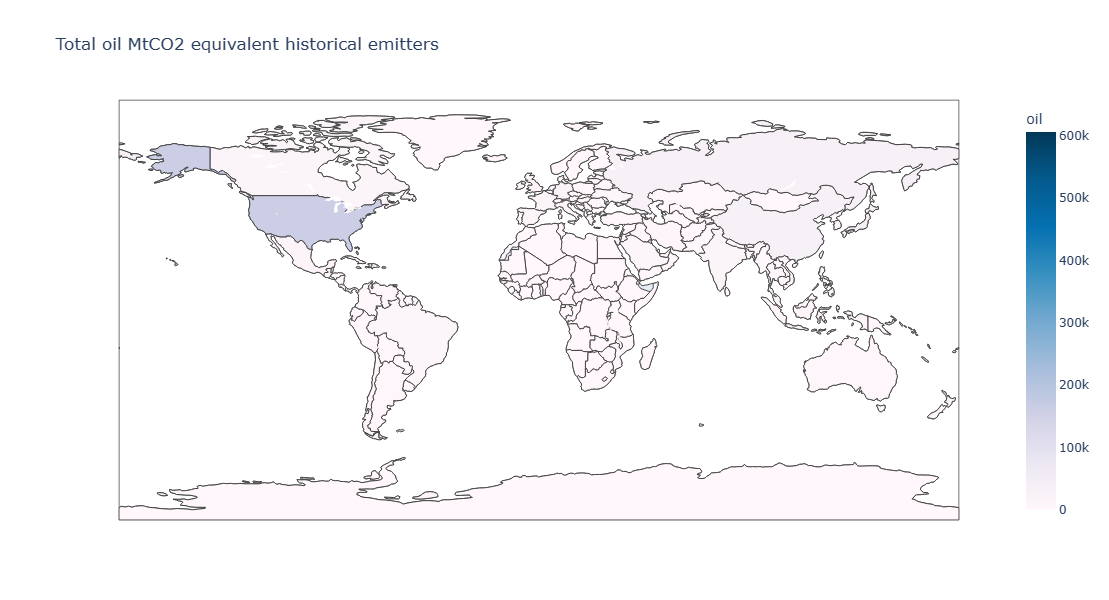

In [19]:
# Showing cumulative oil MtCO2 emissions on a map
oil_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'oil']]
oil_emissions = oil_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
oil_emissions.reset_index(inplace = True)


fig_3 = px.choropleth(
    oil_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'oil',
    color_continuous_scale='pubu',
    title = 'Total oil MtCO2 equivalent historical emitters'
)
fig_3.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_3.show()

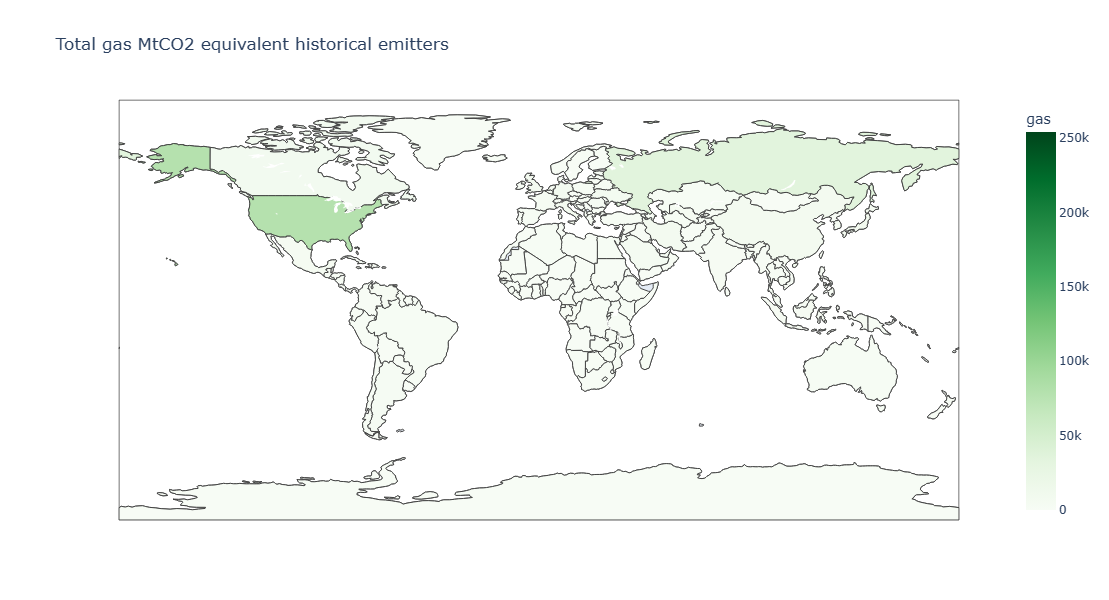

In [20]:
# Showing cumulative gas MtCO2 emissions on a map
gas_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'gas']]
gas_emissions = gas_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
gas_emissions.reset_index(inplace = True)


fig_4 = px.choropleth(
    gas_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'gas',
    color_continuous_scale='greens',
    title = 'Total gas MtCO2 equivalent historical emitters'
)
fig_4.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_4.show()

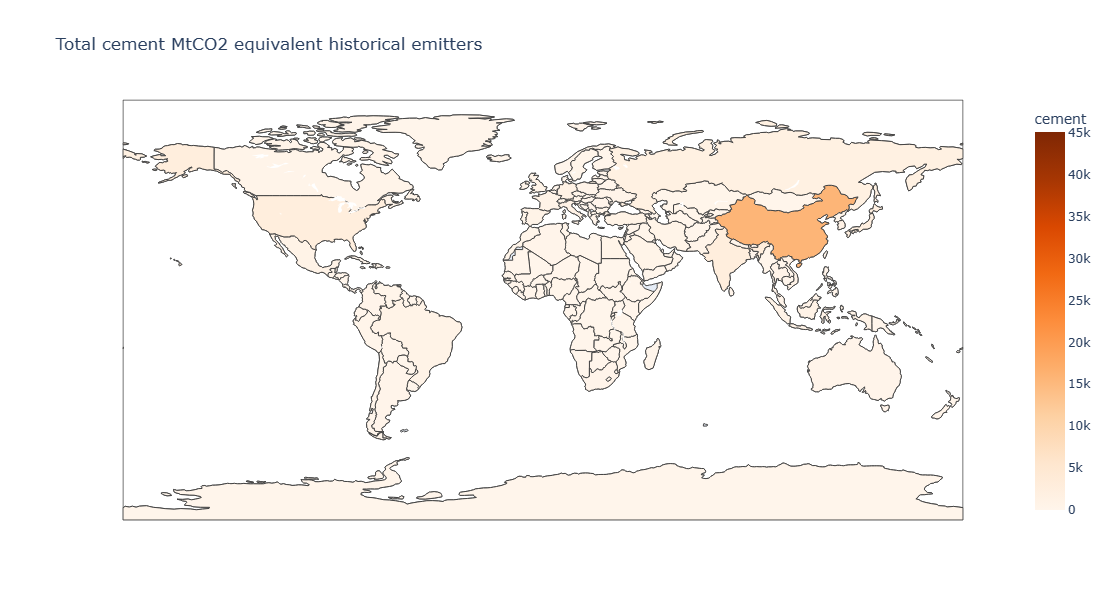

In [21]:
# Showing cumulative cement MtCO2 emissions on a map
cement_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'cement']]
cement_emissions = cement_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
cement_emissions.reset_index(inplace = True)


fig_5 = px.choropleth(
    cement_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'cement',
    color_continuous_scale='oranges',
    title = 'Total cement MtCO2 equivalent historical emitters'
)
fig_5.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_5.show()

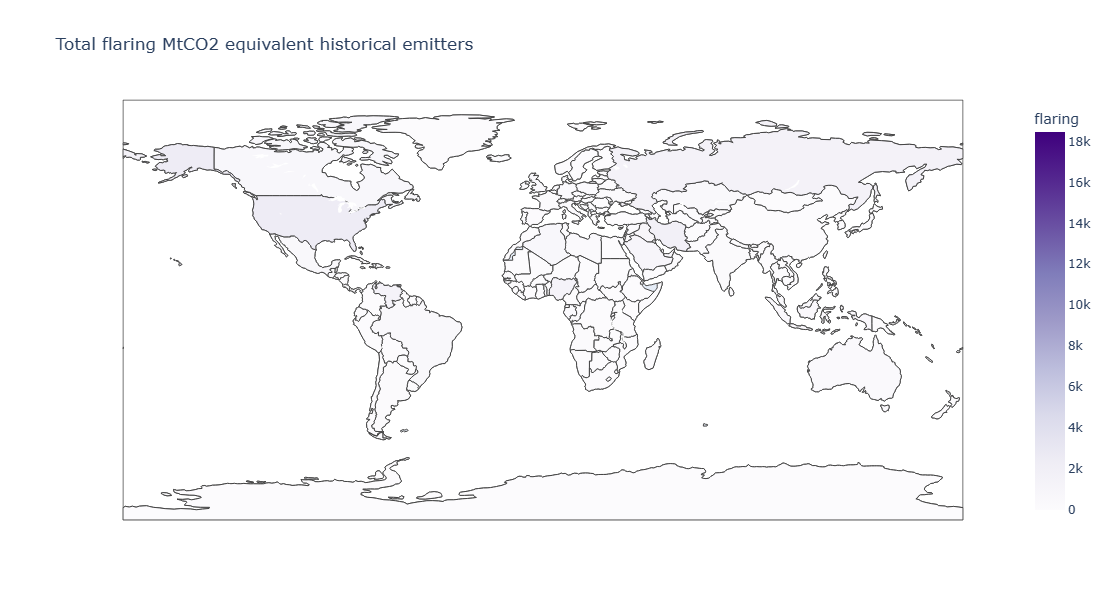

In [22]:
# Showing cumulative flaring MtCO2 emissions on a map
flaring_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'flaring']]
flaring_emissions = flaring_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
flaring_emissions.reset_index(inplace = True)


fig_6 = px.choropleth(
    flaring_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'flaring',
    color_continuous_scale='purples',
    title = 'Total flaring MtCO2 equivalent historical emitters'
)
fig_6.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_6.show()

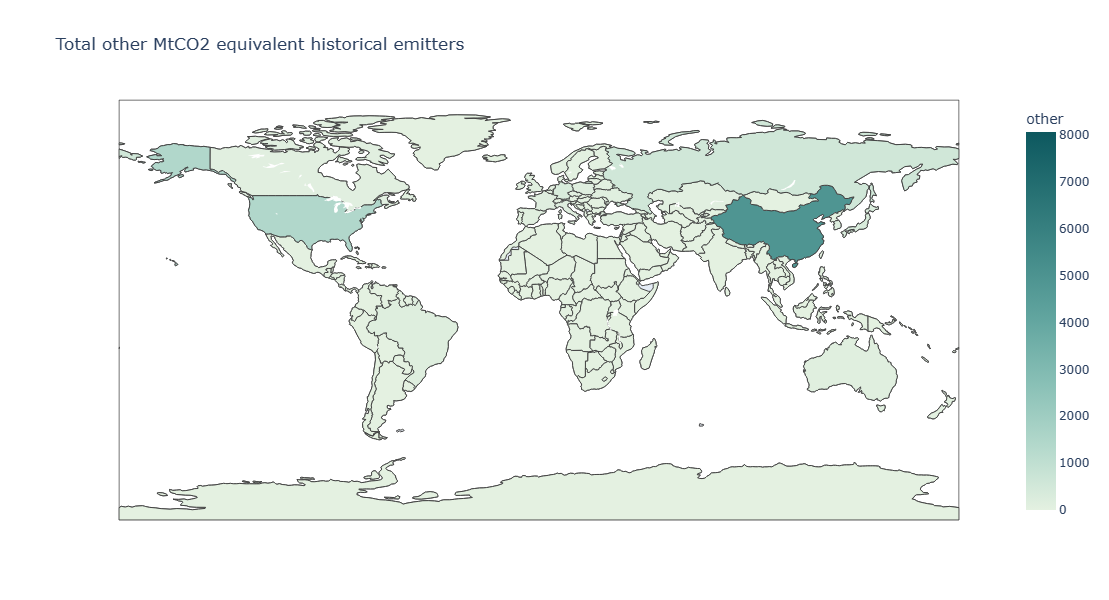

In [23]:
# Showing cumulative other MtCO2 emissions on a map
other_emissions = MtCO2[['country', 'iso 3166-1 alpha-3', 'other']]
other_emissions = other_emissions.groupby(['country', 'iso 3166-1 alpha-3']).sum()
other_emissions.reset_index(inplace = True)


fig_7 = px.choropleth(
    other_emissions,
    locations = 'iso 3166-1 alpha-3', # plotly uses a standard in order to display data
    color = 'other',
    color_continuous_scale='mint',
    title = 'Total other MtCO2 equivalent historical emitters'
)
fig_7.update_layout( # adjusting the chart size
    width=1000,
    height=600, 
)

fig_7.show()

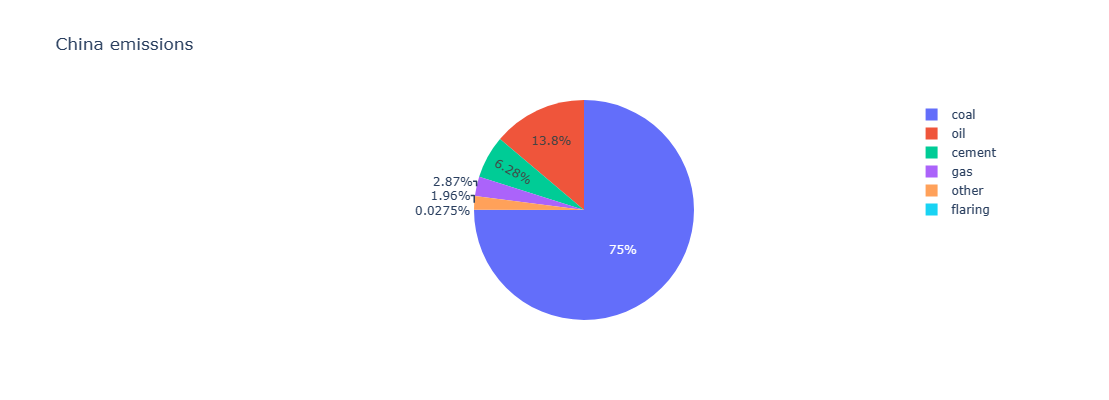

In [37]:
# Let's examine which categories of emissions are predominant in China:
china_emissions = MtCO2.groupby(['country', 'iso 3166-1 alpha-3']).sum().loc['China']
names = list(china_emissions.columns[2:-1])
values = list(china_emissions[names].values.flatten())
px.pie(names = names,values = values, width = 600, height = 400, title = 'China emissions')

Text(0, 0.5, 'MtCO2 equivalent')

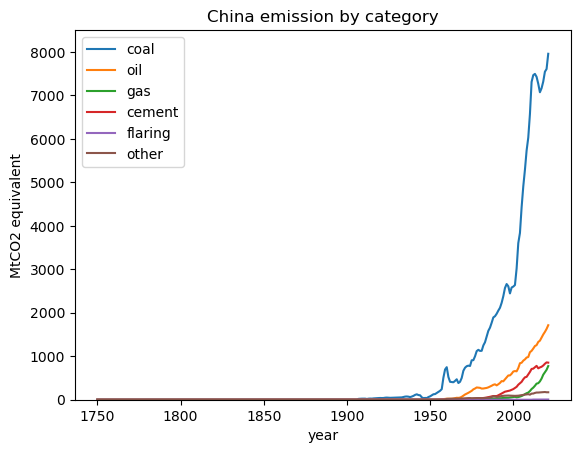

In [25]:
# How did chinese emission categories vary over the years?
for category in MtCO2[MtCO2['country'] == 'China'].columns[4:-1]:
    sns.lineplot(
    data = MtCO2[MtCO2['country'] == 'China'],
    x = 'year',
    y = category,
    label = category,
).set_ylim(0, 8500)
plt.title('China emission by category')
plt.ylabel('MtCO2 equivalent')

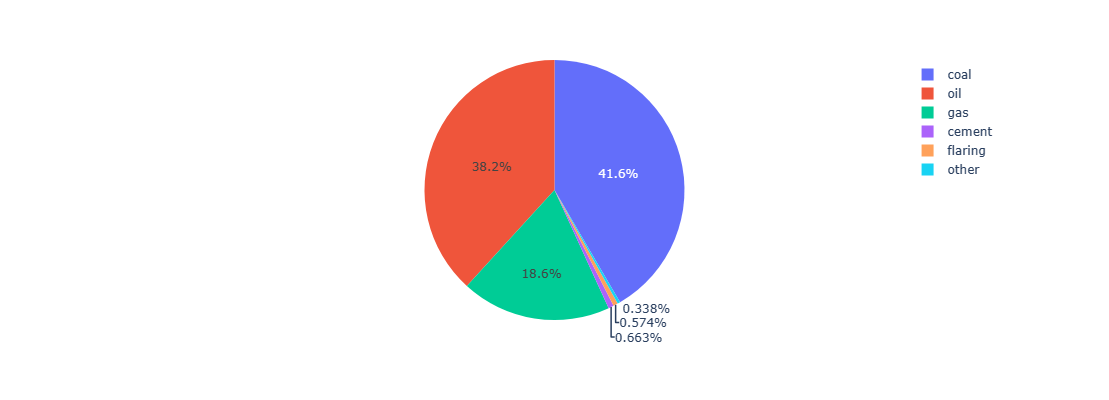

In [26]:
# Let's examine which categories of emissions are predominant in USA:
usa_emissions = MtCO2.groupby(['country', 'iso 3166-1 alpha-3']).sum().loc['USA']
names_usa = list(usa_emissions.columns[2:-1])
values_usa = list(usa_emissions[names_usa].values.flatten())
px.pie(names = names_usa,values = values_usa, width = 600, height = 400)

Text(0, 0.5, 'MtCO2 equivalent')

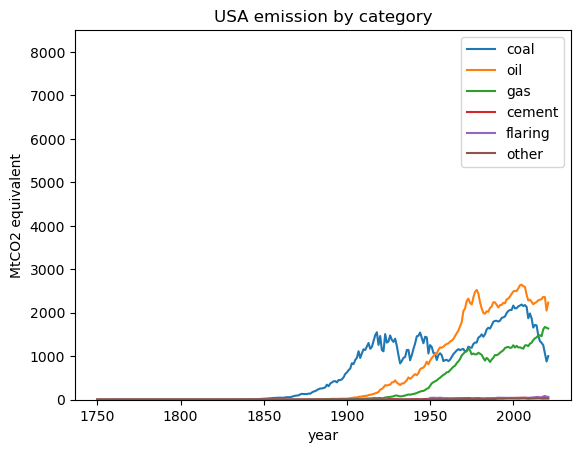

In [27]:
# How did american emission categories vary over the years?
for category in MtCO2[MtCO2['country'] == 'USA'].columns[4:-1]:
    sns.lineplot(
    data = MtCO2[MtCO2['country'] == 'USA'],
    x = 'year',
    y = category,
    label = category
).set_ylim(0, 8500)
plt.title('USA emission by category')
plt.ylabel('MtCO2 equivalent')

In [28]:
# USA started emitting 100 years before China. That's probably why cumulatively USA is the most emitter among all countries.
# However, China is currently emitting the most and much more than USA ever did